In [1]:
cd ..

C:\Users\User\Documents\SURF 2021\RL RNN SURF\src


In [45]:
import pandas as pd
import os

scores = pd.read_csv("selfReportScores.csv")
cie = pd.read_csv("CIE_measures.csv")
merged = scores.merge(cie, on='workerId')

directory = r'C:\Users\User\Documents\SURF 2021\RL RNN SURF\src\taskData'
frames = [pd.read_csv('taskData\\'+filename) for filename in os.listdir(directory)]
taskData = pd.concat(frames, ignore_index=True)

In [46]:
crit = pd.read_csv("excl_crit.csv")
nocareless = crit[crit.survey_catchcorr!=True][crit.survey_irv_min!=True][crit.survey_reliable!=True][crit.survey_rt_min!=True][crit.survey_psychsyn!=True][crit.survey_psychant!=True][crit.task_redo_max!=True]
print(crit.shape[0], nocareless.shape[0])

1197 917


c:\users\user\documents\surf 2021\rl rnn surf\venv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\user\documents\surf 2021\rl rnn surf\venv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\user\documents\surf 2021\rl rnn surf\venv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\user\documents\surf 2021\rl rnn surf\venv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\user\documents\surf 2021\rl rnn surf\venv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [48]:
merged_nocareless = merged[merged['workerId'].isin(nocareless['workerId'])]
print(merged.shape[0], merged_nocareless.shape[0])

1197 917


In [3]:
length = merged.shape[0]
quartile = int(length/4)
first_quartile = range(0,quartile)
last_quartile = range(length-quartile,length)

In [28]:
import scipy.io as spio

mat = spio.loadmat('allSubs_EE_smB_rl.mat', squeeze_me=True)

In [151]:
data = mat['cbm']['input'].item()['data'].item()
param1 = []
param2 = []
scores = []
for i in range(len(data)):
    if data[i]['workerId'].item()[0] in list(bdiTop):
        param1.append(data[i]['fitData'].item()['transParams'].item()[0])
        param2.append(data[i]['fitData'].item()['transParams'].item()[1])
        scores.append(np.nansum(data[i]['reward'].item()))
np.var(scores)

62.58142794154699

[77,
 74.0,
 83.0,
 79.0,
 63.0,
 79,
 83.0,
 88.0,
 79.0,
 77.0,
 86.0,
 76.0,
 76.0,
 79,
 79,
 86,
 80,
 82.0,
 93.0,
 77.0,
 73.0,
 72,
 80,
 76,
 66.0,
 86,
 75.0,
 90.0,
 73,
 79,
 76.0,
 84,
 80.0,
 78.0,
 81,
 85,
 74,
 81.0,
 74,
 68,
 68.0,
 80,
 0.0,
 88,
 76.0,
 76.0,
 77,
 73.0,
 79,
 81.0,
 68.0,
 77.0,
 78.0,
 83,
 85,
 85,
 69.0,
 76,
 85,
 79.0,
 86,
 80,
 79,
 82,
 84,
 83.0,
 83.0,
 80.0,
 85,
 71.0,
 83.0,
 78.0,
 72.0,
 81,
 87.0,
 79.0,
 81.0,
 79,
 80,
 76,
 61.0,
 75.0,
 79.0,
 84.0,
 80,
 76.0,
 74.0,
 78.0,
 87,
 76.0,
 87,
 82.0,
 78.0,
 81,
 82,
 81,
 80.0,
 79,
 81,
 75,
 82.0,
 82,
 71.0,
 80,
 79.0,
 82,
 85,
 82,
 74,
 73.0,
 84,
 59,
 83,
 74,
 83,
 73.0,
 84,
 72.0,
 81.0,
 74,
 82,
 78.0,
 86,
 82,
 86.0,
 79,
 69.0,
 83,
 78,
 79,
 81.0,
 81.0,
 84,
 82.0,
 87,
 82.0,
 82,
 87,
 72,
 83,
 89,
 83.0,
 73,
 82.0,
 80.0,
 85.0,
 88,
 64.0,
 84.0,
 83.0,
 87,
 75.0,
 67,
 54.0,
 78,
 84,
 81.0,
 63.0,
 79.0,
 90.0,
 75.0,
 78,
 78.0,
 74,
 81,
 81.0,
 77

In [74]:
bdi = merged.sort_values(by=['BDI.II'], ignore_index=True)
bdiTop = bdi['workerId'][first_quartile]
bdiBottom = bdi['workerId'][last_quartile]

array([[<AxesSubplot:title={'center':'BDI.II'}>]], dtype=object)

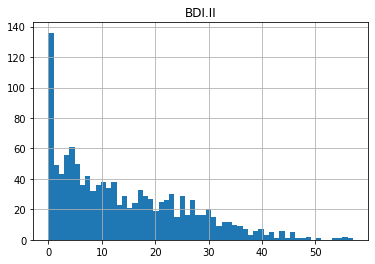

In [163]:
bdi.hist('BDI.II',bins=58)

<AxesSubplot:>

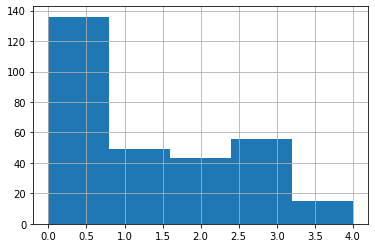

In [162]:
bdiTop = bdi['BDI.II'][first_quartile]
bdiTop.hist(bins=5)

<AxesSubplot:>

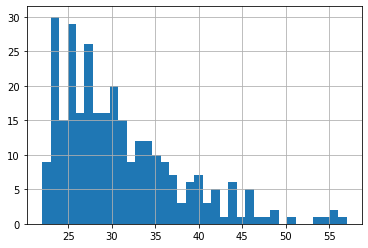

In [168]:
bdiBottom = bdi['BDI.II'][last_quartile]
bdiBottom.hist(bins=36)

In [ ]:
cd quartileData

In [ ]:
barratt = merged.sort_values(by=['Barratt'], ignore_index=True)
barrattTop = barratt['workerId'][first_quartile]
barrattBottom = barratt['workerId'][last_quartile]
taskData_barrattTop = taskData[taskData['workerId'].isin(barrattTop)]
taskData_barrattBottom = taskData[taskData['workerId'].isin(barrattBottom)]
taskData_barrattTop = taskData_barrattTop.dropna(subset=['blockID', 'outcome', 'respKey', 'trialStimID_1', 'trialStimID_2'])
taskData_barrattBottom = taskData_barrattBottom.dropna(subset=['blockID', 'outcome', 'respKey', 'trialStimID_1', 'trialStimID_2'])
taskData_barrattTop.to_csv('taskData_barrattTop.csv', index=False)
taskData_barrattBottom.to_csv('taskData_barrattBottom.csv', index=False)

In [ ]:
stai = merged.sort_values(by=['STAI.T'], ignore_index=True)
staiTop = stai['workerId'][first_quartile]
staiBottom = stai['workerId'][last_quartile]
taskData_staiTop = taskData[taskData['workerId'].isin(staiTop)]
taskData_staiBottom = taskData[taskData['workerId'].isin(staiBottom)]
taskData_staiTop = taskData_staiTop.dropna(subset=['blockID', 'outcome', 'respKey', 'trialStimID_1', 'trialStimID_2'])
taskData_staiBottom = taskData_staiBottom.dropna(subset=['blockID', 'outcome', 'respKey', 'trialStimID_1', 'trialStimID_2'])
taskData_staiTop.to_csv('taskData_staiTop.csv', index=False)
taskData_staiBottom.to_csv('taskData_staiBottom.csv', index=False)

In [ ]:
bdi = merged.sort_values(by=['BDI.II'], ignore_index=True)
bdiTop = bdi['workerId'][first_quartile]
bdiBottom = bdi['workerId'][last_quartile]
taskData_bdiTop = taskData[taskData['workerId'].isin(bdiTop)]
taskData_bdiBottom = taskData[taskData['workerId'].isin(bdiBottom)]
taskData_bdiTop = taskData_bdiTop.dropna(subset=['blockID', 'outcome', 'respKey', 'trialStimID_1', 'trialStimID_2'])
taskData_bdiBottom = taskData_bdiBottom.dropna(subset=['blockID', 'outcome', 'respKey', 'trialStimID_1', 'trialStimID_2'])
taskData_bdiTop.to_csv('taskData_bdiTop.csv', index=False)
taskData_bdiBottom.to_csv('taskData_bdiBottom.csv', index=False)

In [ ]:
bis = merged.sort_values(by=['BIS.BAS'], ignore_index=True)
bisTop = bis['workerId'][first_quartile]
bisBottom = bis['workerId'][last_quartile]
taskData_bisTop = taskData[taskData['workerId'].isin(bisTop)]
taskData_bisBottom = taskData[taskData['workerId'].isin(bisBottom)]
taskData_bisTop = taskData_bisTop.dropna(subset=['blockID', 'outcome', 'respKey', 'trialStimID_1', 'trialStimID_2'])
taskData_bisBottom = taskData_bisBottom.dropna(subset=['blockID', 'outcome', 'respKey', 'trialStimID_1', 'trialStimID_2'])
taskData_bisTop.to_csv('taskData_bisTop.csv', index=False)
taskData_bisBottom.to_csv('taskData_bisBottom.csv', index=False)

In [ ]:
cd ..

Run networks on quartile data, following code merges the predictions

In [ ]:
import numpy as np
import csv

In [ ]:
data={}
with open('policyData_noReward\\taskData_barrattBottom_noReward.csv', 'r' ) as theFile:
    reader = csv.reader(theFile)
    headers = next(reader, None)
    for line in reader:
        if line[3] in barrattBottom.values.tolist():
            if line[3] not in data:
                data[line[3]] = []
            data[line[3]].append(line)
rlpOption={}
with open('rlpOption.csv', 'r' ) as theFile:
    reader = csv.reader(theFile)
    headers = next(reader, None)
    for line in reader:
        if line[0] in data:
            if line[0] not in rlpOption:
                rlpOption[line[0]] = []
                i = 0
            if line[1] != 'NaN':
                data[line[0]][i].append(line[1])
                data[line[0]][i].append(line[2])
                i += 1

In [ ]:
results = [['id','varRNN','varRL']]
for i in data:
    varRNN = sum([np.log(float(pred[1])) for pred in data[i]])
    varRL = sum([np.log(float(pred[5])) for pred in data[i] if len(pred)>5])
    results.append([i,varRNN,varRL])
np.savetxt("varData_noReward\\results_barrattBottom_noReward.csv", 
           results,
           delimiter =", ", 
           fmt ='% s')

In [ ]:
data={}
with open('policyData_noReward\\taskData_barrattTop_noReward.csv', 'r' ) as theFile:
    reader = csv.reader(theFile)
    headers = next(reader, None)
    for line in reader:
        if line[3] in barrattTop.values.tolist():
            if line[3] not in data:
                data[line[3]] = []
            data[line[3]].append(line)
rlpOption={}
with open('rlpOption.csv', 'r' ) as theFile:
    reader = csv.reader(theFile)
    headers = next(reader, None)
    for line in reader:
        if line[0] in data:
            if line[0] not in rlpOption:
                rlpOption[line[0]] = []
                i = 0
            if line[1] != 'NaN':
                data[line[0]][i].append(line[1])
                data[line[0]][i].append(line[2])
                i += 1

In [ ]:
results = [['id','varRNN','varRL']]
for i in data:
    varRNN = sum([np.log(float(pred[1])) for pred in data[i]])
    varRL = sum([np.log(float(pred[5])) for pred in data[i] if len(pred)>5])
    results.append([i,varRNN,varRL])
np.savetxt("varData_noReward\\results_barrattTop_noReward.csv", 
           results,
           delimiter =", ", 
           fmt ='% s')

In [ ]:
data={}
with open('policyData_noReward\\taskData_bdiBottom_noReward.csv', 'r' ) as theFile:
    reader = csv.reader(theFile)
    headers = next(reader, None)
    for line in reader:
        if line[3] in bdiBottom.values.tolist():
            if line[3] not in data:
                data[line[3]] = []
            data[line[3]].append(line)
rlpOption={}
with open('rlpOption.csv', 'r' ) as theFile:
    reader = csv.reader(theFile)
    headers = next(reader, None)
    for line in reader:
        if line[0] in data:
            if line[0] not in rlpOption:
                rlpOption[line[0]] = []
                i = 0
            if line[1] != 'NaN':
                data[line[0]][i].append(line[1])
                data[line[0]][i].append(line[2])
                i += 1

In [ ]:
results = [['id','varRNN','varRL']]
for i in data:
    varRNN = sum([np.log(float(pred[1])) for pred in data[i]])
    varRL = sum([np.log(float(pred[5])) for pred in data[i] if len(pred)>5])
    results.append([i,varRNN,varRL])
np.savetxt("varData_noReward\\results_bdiBottom_noReward.csv", 
           results,
           delimiter =", ", 
           fmt ='% s')

In [ ]:
data={}
with open('policyData_noReward\\taskData_bdiTop_noReward.csv', 'r' ) as theFile:
    reader = csv.reader(theFile)
    headers = next(reader, None)
    for line in reader:
        if line[3] in bdiTop.values.tolist():
            if line[3] not in data:
                data[line[3]] = []
            data[line[3]].append(line)
rlpOption={}
with open('rlpOption.csv', 'r' ) as theFile:
    reader = csv.reader(theFile)
    headers = next(reader, None)
    for line in reader:
        if line[0] in data:
            if line[0] not in rlpOption:
                rlpOption[line[0]] = []
                i = 0
            if line[1] != 'NaN':
                data[line[0]][i].append(line[1])
                data[line[0]][i].append(line[2])
                i += 1

In [ ]:
results = [['id','varRNN','varRL']]
for i in data:
    varRNN = sum([np.log(float(pred[1])) for pred in data[i]])
    varRL = sum([np.log(float(pred[5])) for pred in data[i] if len(pred)>5])
    results.append([i,varRNN,varRL])
np.savetxt("varData_noReward\\results_bdiTop_noReward.csv", 
           results,
           delimiter =", ", 
           fmt ='% s')

In [ ]:
data={}
with open('policyData\\taskData_bisBottom.csv', 'r' ) as theFile:
    reader = csv.reader(theFile)
    headers = next(reader, None)
    for line in reader:
        if line[3] in bisBottom.values.tolist():
            if line[3] not in data:
                data[line[3]] = []
            data[line[3]].append(line)
rlpOption={}
with open('rlpOption.csv', 'r' ) as theFile:
    reader = csv.reader(theFile)
    headers = next(reader, None)
    for line in reader:
        if line[0] in data:
            if line[0] not in rlpOption:
                rlpOption[line[0]] = []
                i = 0
            if line[1] != 'NaN':
                data[line[0]][i].append(line[1])
                data[line[0]][i].append(line[2])
                i += 1

In [ ]:
results = [['id','varRNN','varRL']]
for i in data:
    varRNN = sum([np.log(float(pred[1])) for pred in data[i]])
    varRL = sum([np.log(float(pred[5])) for pred in data[i] if len(pred)>5])
    results.append([i,varRNN,varRL])
np.savetxt("varData\\results_bisBottom.csv", 
           results,
           delimiter =", ", 
           fmt ='% s')

In [ ]:
data={}
with open('policyData\\taskData_bisTop.csv', 'r' ) as theFile:
    reader = csv.reader(theFile)
    headers = next(reader, None)
    for line in reader:
        if line[3] in bisTop.values.tolist():
            if line[3] not in data:
                data[line[3]] = []
            data[line[3]].append(line)
rlpOption={}
with open('rlpOption.csv', 'r' ) as theFile:
    reader = csv.reader(theFile)
    headers = next(reader, None)
    for line in reader:
        if line[0] in data:
            if line[0] not in rlpOption:
                rlpOption[line[0]] = []
                i = 0
            if line[1] != 'NaN':
                data[line[0]][i].append(line[1])
                data[line[0]][i].append(line[2])
                i += 1

In [ ]:
results = [['id','varRNN','varRL']]
for i in data:
    varRNN = sum([np.log(float(pred[1])) for pred in data[i]])
    varRL = sum([np.log(float(pred[5])) for pred in data[i] if len(pred)>5])
    results.append([i,varRNN,varRL])
np.savetxt("varData\\results_bisTop.csv", 
           results,
           delimiter =", ", 
           fmt ='% s')

In [ ]:
data={}
with open('policyData\\taskData_staiBottom.csv', 'r' ) as theFile:
    reader = csv.reader(theFile)
    headers = next(reader, None)
    for line in reader:
        if line[3] in staiBottom.values.tolist():
            if line[3] not in data:
                data[line[3]] = []
            data[line[3]].append(line)
rlpOption={}
with open('rlpOption.csv', 'r' ) as theFile:
    reader = csv.reader(theFile)
    headers = next(reader, None)
    for line in reader:
        if line[0] in data:
            if line[0] not in rlpOption:
                rlpOption[line[0]] = []
                i = 0
            if line[1] != 'NaN':
                data[line[0]][i].append(line[1])
                data[line[0]][i].append(line[2])
                i += 1

In [ ]:
results = [['id','varRNN','varRL']]
for i in data:
    varRNN = sum([np.log(float(pred[1])) for pred in data[i]])
    varRL = sum([np.log(float(pred[5])) for pred in data[i] if len(pred)>5])
    results.append([i,varRNN,varRL])
np.savetxt("varData\\results_staiBottom.csv", 
           results,
           delimiter =", ", 
           fmt ='% s')

In [ ]:
data={}
with open('policyData\\taskData_staiTop.csv', 'r' ) as theFile:
    reader = csv.reader(theFile)
    headers = next(reader, None)
    for line in reader:
        if line[3] in staiTop.values.tolist():
            if line[3] not in data:
                data[line[3]] = []
            data[line[3]].append(line)
rlpOption={}
with open('rlpOption.csv', 'r' ) as theFile:
    reader = csv.reader(theFile)
    headers = next(reader, None)
    for line in reader:
        if line[0] in data:
            if line[0] not in rlpOption:
                rlpOption[line[0]] = []
                i = 0
            if line[1] != 'NaN':
                data[line[0]][i].append(line[1])
                data[line[0]][i].append(line[2])
                i += 1

In [ ]:
results = [['id','varRNN','varRL']]
for i in data:
    varRNN = sum([np.log(float(pred[1])) for pred in data[i]])
    varRL = sum([np.log(float(pred[5])) for pred in data[i] if len(pred)>5])
    results.append([i,varRNN,varRL])
np.savetxt("varData\\results_staiTop.csv", 
           results,
           delimiter =", ", 
           fmt ='% s')